In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import sys,os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2

In [2]:
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

In [3]:
df = pd.read_csv('/Users/alicegoulley/code/Alispirale/StarWars/raw_data/training_solutions_rev1.csv')
df.head(10)

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.000000,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.000000,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.000000,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,100122,0.738832,0.238159,0.023009,0.000000,0.238159,0.000000,0.238159,0.000000,0.238159,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,100123,0.462492,0.456033,0.081475,0.000000,0.456033,0.000000,0.456033,0.000000,0.456033,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,100128,0.687783,0.288344,0.023873,0.000000,0.288344,0.069098,0.219246,0.000000,0.288344,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,100134,0.021834,0.976952,0.001214,0.021751,0.955201,0.313077,0.642124,0.546491,0.408711,...,0.021751,0.207253,0.152044,0.187194,0.000000,0.000000,0.054649,0.081974,0.081974,0.327894
9,100143,0.269843,0.730157,0.000000,0.730157,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.168728,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
pwd

'/Users/alicegoulley/code/Alispirale/StarWars/notebooks'

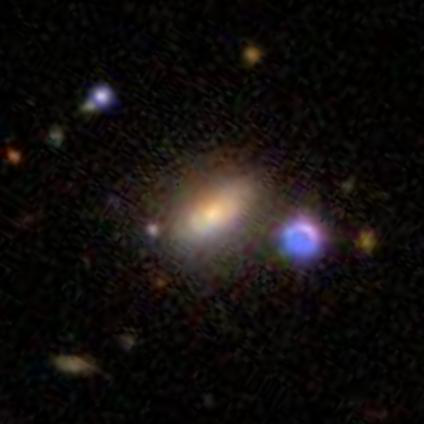

In [5]:
Image.open("../raw_data/images_test_rev1/100889.jpg")

# Data Augmentation

In [6]:
datagen = ImageDataGenerator()

In [7]:
img = load_img('../raw_data/images_test_rev1/100889.jpg')

In [8]:
data = img_to_array(img)

In [9]:
samples = expand_dims(data, 0)

## Horizontal/Vertical augmentation

In [10]:
datagen = ImageDataGenerator(width_shift_range=[-200,200])

In [11]:
it = datagen.flow(samples, batch_size=1)

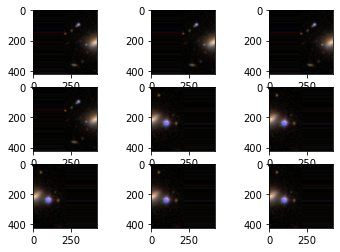

In [12]:
for i in range(9):
# define subplot
    pyplot.subplot(330 + 1 + i)
# generate batch of images
    batch = it.next()
# convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
# plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

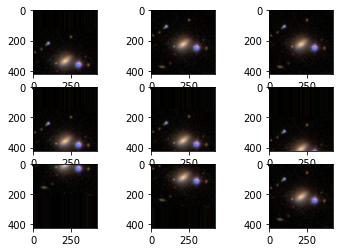

In [13]:
datagen2 = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen2.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

## Horizontal and Vertical flip

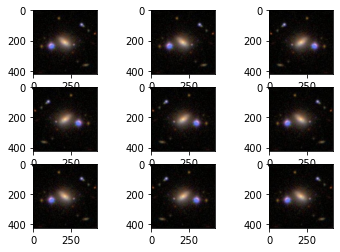

In [14]:
datagen3 = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen3.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

## Random Rotation

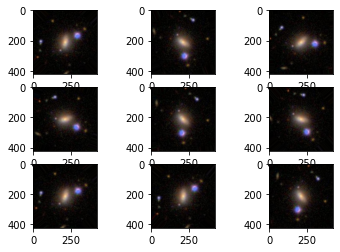

In [15]:
datagen4 = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen4.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

## Random Brightness

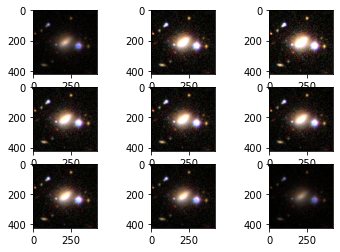

In [16]:
datagen5 = ImageDataGenerator(brightness_range=[0.2,3.0])
# prepare iterator
it = datagen5.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

## Random Zoom

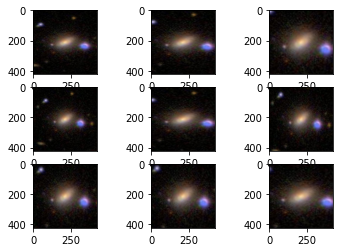

In [17]:
datagen6 = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
it = datagen6.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
# define subplot
    pyplot.subplot(330 + 1 + i)
# generate batch of images
    batch = it.next()
# convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
# plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [18]:
datagen7 = ImageDataGenerator(
        rotation_range=90,
        width_shift_range=[-50,50],
        height_shift_range=0.5,
        brightness_range= [0.2, 1.9],
        #channel_shift_range = 0.8,
        #shear_range=0.7,
        #zoom_range=[0.3,1.5],
        horizontal_flip=True,
        fill_mode='nearest'
)

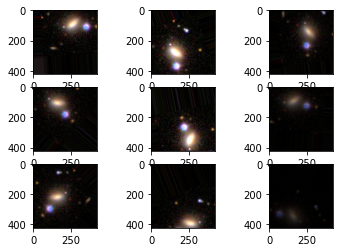

In [19]:
it = datagen7.flow(samples, batch_size=1)

for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)
pyplot.show()

## Noise

In [20]:
test_image = np.array(img)

In [21]:
test_image.shape

(424, 424, 3)

<ipython-input-22-e3b6f8c4b0d1>:7: RuntimeWarning: overflow encountered in ubyte_scalars
  test_image[i][j][k] += noise[i][j][k]


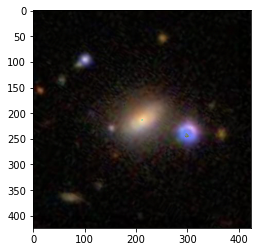

In [22]:
noise = np.random.randint(5, size = (424,424,3), dtype = 'uint8')

for i in range(400):
    for j in range(400):
        for k in range(3):
            #if (test_image[i][j][k] != 100):
            test_image[i][j][k] += noise[i][j][k]
plt.imshow(test_image)
plt.show()

## Resize

In [23]:
my_image = cv2.imread("../raw_data/images_test_rev1/100889.jpg")
my_image = cv2.resize(my_image, (224, 224))

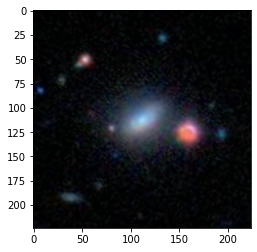

In [24]:
plt.imshow(my_image)
plt.show()

## Color

In [25]:
color_img = cv2.imread("../raw_data/images_test_rev1/100889.jpg")

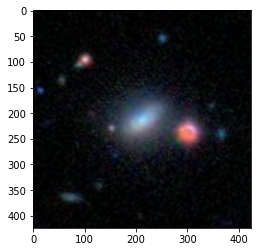

In [26]:
plt.imshow(color_img)
plt.show()

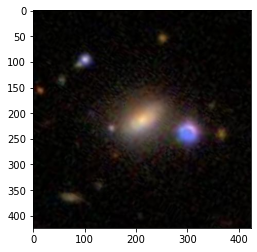

In [27]:
color_img2 = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)
plt.imshow(color_img2)
plt.show()

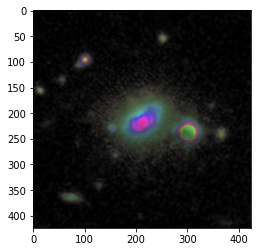

In [37]:
color_img4 = cv2.cvtColor(color_img, cv2.COLOR_HSV2RGB)
plt.imshow(color_img4)
plt.show()

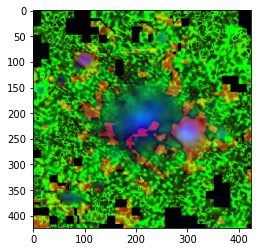

In [30]:
color_img3 = cv2.cvtColor(color_img, cv2.COLOR_BGR2HSV)
plt.imshow(color_img3)
plt.show()

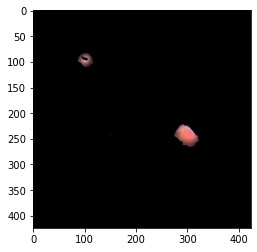

In [31]:
hsv = cv2.cvtColor(color_img, cv2.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(color_img,color_img, mask= mask)

plt.imshow(res)
plt.show()